# **Preprocessing**

In [ ]:
from google.colab import files

# Upload kaggle.json
print("Please upload your kaggle.json file:")
files.upload()

# Make a directory for Kaggle and move the token there
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
print("Kaggle API token uploaded and configured.")

Please upload your kaggle.json file:


Saving kaggle.json to kaggle.json
Kaggle API token uploaded and configured.


In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d mahdieizadpanah/birjand-university-mobile-palmprint-databasebmpd

Dataset URL: https://www.kaggle.com/datasets/mahdieizadpanah/birjand-university-mobile-palmprint-databasebmpd
License(s): unknown
 99% 1.65G/1.67G [00:25<00:00, 87.4MB/s]
100% 1.67G/1.67G [00:26<00:00, 68.6MB/s]


In [ ]:
import zipfile
import os

zip_file_name = 'birjand-university-mobile-palmprint-databasebmpd.zip'
extracted_folder_name = 'BMPD_Dataset' # You can choose any name for the extracted folder

if os.path.exists(zip_file_name):
    with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
        zip_ref.extractall(extracted_folder_name)
    print(f"Dataset unzipped to '{extracted_folder_name}'")
else:
    print(f"Error: {zip_file_name} not found. Make sure the download was successful.")

# List the contents to verify
print("Contents of the extracted folder:")
!ls -F {extracted_folder_name}

Dataset unzipped to 'BMPD_Dataset'
Contents of the extracted folder:
'Birjand University Mobile Palmprint Database (BMPD)'/


In [ ]:
import os

extracted_folder_name = 'BMPD_Dataset' # Make sure this matches your extraction folder name

if os.path.exists(extracted_folder_name):
    print(f"Contents of '{extracted_folder_name}':")
    # This command lists all files and directories recursively
    !ls -R {extracted_folder_name}
else:
    print(f"Error: The folder '{extracted_folder_name}' does not exist.")
    print("Please check if the dataset was unzipped successfully and the folder name is correct.")

Contents of 'BMPD_Dataset':
BMPD_Dataset:
'Birjand University Mobile Palmprint Database (BMPD)'

'BMPD_Dataset/Birjand University Mobile Palmprint Database (BMPD)':
001  004  007  010  013  016  019  022	025  028  031  034  037  040
002  005  008  011  014  017  020  023	026  029  032  035  038  041
003  006  009  012  015  018  021  024	027  030  033  036  039

'BMPD_Dataset/Birjand University Mobile Palmprint Database (BMPD)/001':
001_F_L_30.JPG	001_F_L_38.JPG	001_F_R_6.JPG	001_S_L_24.JPG	001_S_R_12.JPG
001_F_L_31.JPG	001_F_L_39.JPG	001_F_R_7.JPG	001_S_L_25.JPG	001_S_R_13.JPG
001_F_L_32.JPG	001_F_R_0.JPG	001_F_R_8.JPG	001_S_L_26.JPG	001_S_R_14.JPG
001_F_L_33.JPG	001_F_R_1.JPG	001_F_R_9.JPG	001_S_L_27.JPG	001_S_R_15.JPG
001_F_L_34.JPG	001_F_R_2.JPG	001_S_L_20.JPG	001_S_L_28.JPG	001_S_R_16.JPG
001_F_L_35.JPG	001_F_R_3.JPG	001_S_L_21.JPG	001_S_L_29.JPG	001_S_R_17.JPG
001_F_L_36.JPG	001_F_R_4.JPG	001_S_L_22.JPG	001_S_R_10.JPG	001_S_R_18.JPG
001_F_L_37.JPG	001_F_R_5.JPG	001_S_L_23.JPG	001

Found 1612 images.


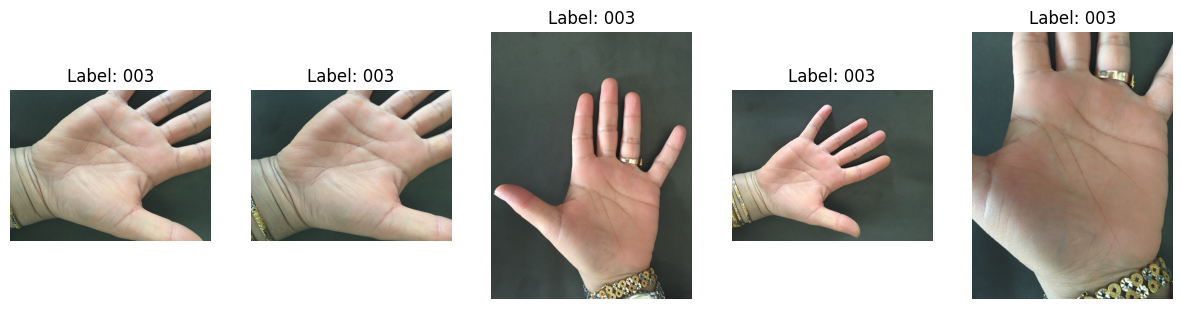

In [ ]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

# --- CORRECTED PATH based on your `ls -R` output ---
# The parent folder of 001, 002, etc., is the one with the long name.
# You need to join 'BMPD_Dataset' with this long folder name.
data_dir = os.path.join('BMPD_Dataset', 'Birjand University Mobile Palmprint Database (BMPD)')

image_paths = []
labels = []

# Ensure the data_dir exists before proceeding
if not os.path.exists(data_dir):
    print(f"Error: The specified data directory '{data_dir}' does not exist. Please correct the path.")
else:
    # Iterate through all files in the data_dir and its subdirectories
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            # All your image files are .JPG, so let's explicitly check for that
            if file.lower().endswith('.jpg'):
                image_path = os.path.join(root, file)
                image_paths.append(image_path)

                # --- Labeling Logic ---
                # The label (subject ID) is the name of the immediate parent folder (e.g., '001', '002').
                # os.path.basename(root) will correctly extract '001', '002', etc.
                label = os.path.basename(root)
                labels.append(label)

    print(f"Found {len(image_paths)} images.")

    if len(image_paths) > 0:
        # Example: Load and display a few images
        num_images_to_show = min(5, len(image_paths))
        plt.figure(figsize=(15, 5))
        for i in range(num_images_to_show):
            img_path = image_paths[i]
            img = cv2.imread(img_path)
            if img is not None:
                # OpenCV loads images in BGR, matplotlib expects RGB
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                plt.subplot(1, num_images_to_show, i + 1)
                plt.imshow(img_rgb)
                plt.title(f"Label: {labels[i]}")
                plt.axis('off')
            else:
                print(f"Warning: Could not load image {img_path}")
        plt.show()
    else:
        print("No images found in the specified directory. Check file extensions or deeper nesting.")

### **Set up paths and create the processed folder**

In [ ]:
import os

# Path to raw data (update if renamed)
raw_data_dir = os.path.join('BMPD_Dataset', 'Birjand University Mobile Palmprint Database (BMPD)')

# New folder to save processed images
processed_data_dir = 'processed_dataset'
os.makedirs(processed_data_dir, exist_ok=True)

### **Define preprocessing functions (grayscale, resize, normalize)**

In [ ]:
import cv2
import numpy as np

def preprocess_image(img_path, size=(224, 224)):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"[WARN] Could not load {img_path}")
        return None
    img = cv2.resize(img, size)
    img = img / 255.0  # Normalize to [0, 1]
    return img

### **Process and save all images**

In [ ]:
from tqdm import tqdm

processed_count = 0

for root, dirs, files in os.walk(raw_data_dir):
    for file in tqdm(files):
        if file.lower().endswith('.jpg'):
            input_path = os.path.join(root, file)
            rel_path = os.path.relpath(input_path, raw_data_dir)
            output_path = os.path.join(processed_data_dir, rel_path)

            # Preprocess
            processed_img = preprocess_image(input_path)
            if processed_img is not None:
                # Convert to uint8 for saving
                out_img = (processed_img * 255).astype(np.uint8)

                # Make output folder if missing
                os.makedirs(os.path.dirname(output_path), exist_ok=True)

                # Save image
                cv2.imwrite(output_path, out_img)
                processed_count += 1

print(f"\n✅ Processed and saved {processed_count} images to '{processed_data_dir}'")

0it [00:00, ?it/s]
100%|██████████| 40/40 [00:01<00:00, 24.27it/s]


✅ Processed and saved 1612 images to 'processed_dataset'


### **Sample Processed Images**

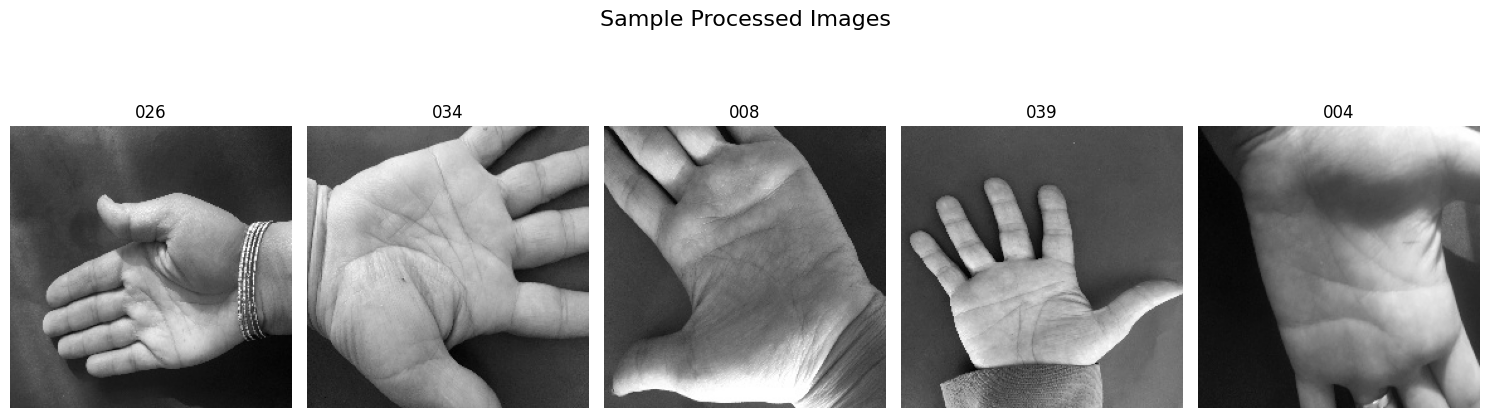

In [ ]:
import cv2
import matplotlib.pyplot as plt
import random
import os

# Path to processed dataset
processed_path = 'processed_dataset'
all_files = [os.path.join(dp, f) for dp, dn, filenames in os.walk(processed_path) for f in filenames if f.lower().endswith('.jpg')]

# Display 5 random processed images
num_samples = min(5, len(all_files))
sampled_files = random.sample(all_files, num_samples)

plt.figure(figsize=(15, 5))
for i, file in enumerate(sampled_files):
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"{os.path.basename(os.path.dirname(file))}")
    plt.axis('off')
plt.suptitle("Sample Processed Images", fontsize=16)
plt.tight_layout()
plt.show()

### **Log the number of processed images per user/class**

In [ ]:
import os
from collections import defaultdict

# Directory where processed images are stored
processed_path = 'processed_dataset'

# Dictionary to hold count per class
class_counts = defaultdict(int)

# Count images per user/class
for root, dirs, files in os.walk(processed_path):
    for file in files:
        if file.lower().endswith('.jpg'):
            label = os.path.basename(root)  # Folder name is the label (e.g., '001')
            class_counts[label] += 1

# Log the counts
print("\nProcessed Image Count per Class/User:")
for label, count in sorted(class_counts.items()):
    print(f"User {label}: {count} images")


Processed Image Count per Class/User:
User 001: 40 images
User 002: 40 images
User 003: 40 images
User 004: 40 images
User 005: 40 images
User 006: 40 images
User 007: 40 images
User 008: 40 images
User 009: 40 images
User 010: 40 images
User 011: 40 images
User 012: 40 images
User 013: 40 images
User 014: 40 images
User 015: 40 images
User 016: 40 images
User 017: 40 images
User 018: 40 images
User 019: 40 images
User 020: 40 images
User 021: 12 images
User 022: 40 images
User 023: 40 images
User 024: 40 images
User 025: 40 images
User 026: 40 images
User 027: 40 images
User 028: 40 images
User 029: 40 images
User 030: 40 images
User 031: 40 images
User 032: 40 images
User 033: 40 images
User 034: 40 images
User 035: 40 images
User 036: 40 images
User 037: 40 images
User 038: 40 images
User 039: 40 images
User 040: 40 images
User 041: 40 images


### **zipping the processed dataset**

In [ ]:
!zip -r processed_dataset.zip processed_dataset

  adding: processed_dataset/ (stored 0%)
  adding: processed_dataset/003/ (stored 0%)
  adding: processed_dataset/003/003_F_R_7.JPG (deflated 0%)
  adding: processed_dataset/003/003_S_R_11.JPG (deflated 0%)
  adding: processed_dataset/003/003_S_L_20.JPG (deflated 0%)
  adding: processed_dataset/003/003_F_R_4.JPG (deflated 0%)
  adding: processed_dataset/003/003_S_L_21.JPG (deflated 0%)
  adding: processed_dataset/003/003_S_R_16.JPG (deflated 0%)
  adding: processed_dataset/003/003_F_R_0.JPG (deflated 0%)
  adding: processed_dataset/003/003_S_L_25.JPG (deflated 0%)
  adding: processed_dataset/003/003_S_L_26.JPG (deflated 0%)
  adding: processed_dataset/003/003_S_L_24.JPG (deflated 0%)
  adding: processed_dataset/003/003_S_R_13.JPG (deflated 0%)
  adding: processed_dataset/003/003_S_L_27.JPG (deflated 0%)
  adding: processed_dataset/003/003_F_L_38.JPG (deflated 0%)
  adding: processed_dataset/003/003_F_L_32.JPG (deflated 0%)
  adding: processed_dataset/003/003_F_R_1.JPG (deflated 0%)
  a

### **downloading the processed dataset**

In [ ]:
from google.colab import files
files.download("processed_dataset.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Create image loader & visualizer functions**

 Scanning folder: BMPD_Dataset/Birjand University Mobile Palmprint Database (BMPD)
 Found 5 users. Loading up to 2 images per user...

 Loaded: 001_F_R_9.JPG (User: 001)
 Loaded: 001_F_L_34.JPG (User: 001)
 Loaded: 002_S_R_17.JPG (User: 002)
 Loaded: 002_S_L_27.JPG (User: 002)
 Loaded: 003_F_R_7.JPG (User: 003)
 Loaded: 003_S_R_11.JPG (User: 003)
 Loaded: 004_F_R_5.JPG (User: 004)
 Loaded: 004_S_R_18.JPG (User: 004)
 Loaded: 005_F_L_36.JPG (User: 005)
 Loaded: 005_S_R_15.JPG (User: 005)

  Total images loaded: 10


 Showing 5 original vs processed image comparisons:

---
 Image 1: 001_F_R_9.JPG
 Preprocessing image...
 Resized to (128, 128)
 Applying CLAHE...
 Normalized to range [0, 1]
---
 Image 2: 001_F_L_34.JPG
 Preprocessing image...
 Resized to (128, 128)
 Applying CLAHE...
 Normalized to range [0, 1]
---
 Image 3: 002_S_R_17.JPG
 Preprocessing image...
 Resized to (128, 128)
 Applying CLAHE...
 Normalized to range [0, 1]
---
 Image 4: 002_S_L_27.JPG
 Preprocessing image...
 Resi

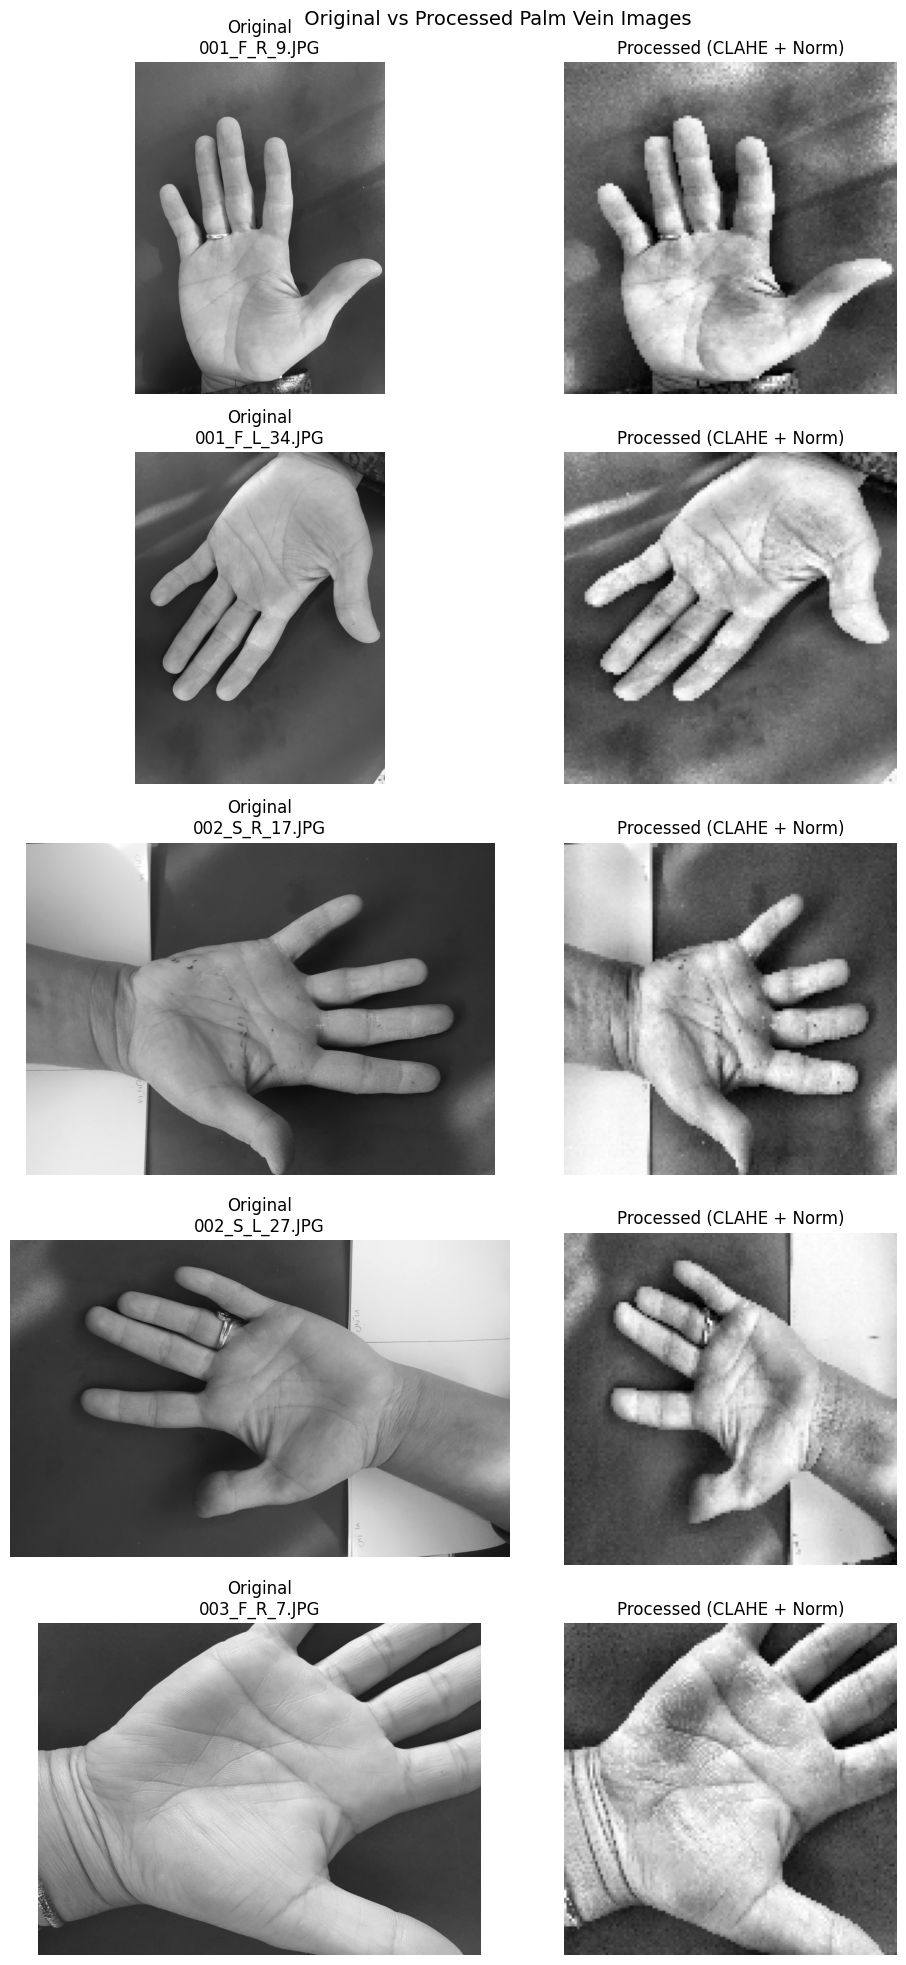

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

#  Loader
def load_palm_images(data_dir, resize_dim=(128, 128), max_users=5, max_images_per_user=2):
    image_paths = []
    labels = []

    print(f" Scanning folder: {data_dir}")
    user_ids = sorted(os.listdir(data_dir))[:max_users]
    print(f" Found {len(user_ids)} users. Loading up to {max_images_per_user} images per user...\n")

    for user_id in user_ids:
        user_path = os.path.join(data_dir, user_id)
        if os.path.isdir(user_path):
            img_files = [f for f in os.listdir(user_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))][:max_images_per_user]
            for img_file in img_files:
                full_path = os.path.join(user_path, img_file)
                image_paths.append(full_path)
                labels.append(user_id)
                print(f" Loaded: {img_file} (User: {user_id})")

    print(f"\n  Total images loaded: {len(image_paths)}\n")
    return image_paths, labels

#  Preprocessing
def preprocess_image(image, size=(128, 128), apply_clahe=True):
    print(f" Preprocessing image...")
    image = cv2.resize(image, size)
    print(f" Resized to {size}")
    if apply_clahe:
        print(f" Applying CLAHE...")
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        image = clahe.apply(image)
    image = image / 255.0
    print(f" Normalized to range [0, 1]")
    return image

#  Visualizer
def compare_original_vs_processed(image_paths, n=3):
    plt.figure(figsize=(10, 4 * n))
    print(f"\n Showing {n} original vs processed image comparisons:\n")

    for i in range(n):
        path = image_paths[i]
        filename = os.path.basename(path)

        print(f"---\n Image {i+1}: {filename}")
        original = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        processed = preprocess_image(original.copy())

        # Plot original
        plt.subplot(n, 2, 2*i + 1)
        plt.imshow(original, cmap='gray')
        plt.title(f"Original\n{filename}")
        plt.axis('off')

        # Plot processed
        plt.subplot(n, 2, 2*i + 2)
        plt.imshow(processed, cmap='gray')
        plt.title("Processed (CLAHE + Norm)")
        plt.axis('off')

    plt.suptitle(" Original vs Processed Palm Vein Images", fontsize=14)
    plt.tight_layout()
    plt.show()

# RUN Everything Below This Line

data_dir = os.path.join("BMPD_Dataset", "Birjand University Mobile Palmprint Database (BMPD)")
image_paths, labels = load_palm_images(data_dir, max_users=5, max_images_per_user=2)
compare_original_vs_processed(image_paths, n=5)


### **Apply preprocessing pipeline on full dataset**

 Scanning dataset at: BMPD_Dataset/Birjand University Mobile Palmprint Database (BMPD)
 Found 5 users. Processing up to 5 images per user.
 Processed: 001_F_R_9.JPG (User: 001)
 Processed: 001_F_L_34.JPG (User: 001)
 Processed: 001_S_L_21.JPG (User: 001)
 Processed: 001_S_L_25.JPG (User: 001)
 Processed: 001_F_R_3.JPG (User: 001)
 Processed: 002_S_R_17.JPG (User: 002)
 Processed: 002_S_L_27.JPG (User: 002)
 Processed: 002_F_L_31.JPG (User: 002)
 Processed: 002_S_R_10.JPG (User: 002)
 Processed: 002_S_L_21.JPG (User: 002)
 Processed: 003_F_R_7.JPG (User: 003)
 Processed: 003_S_R_11.JPG (User: 003)
 Processed: 003_S_L_20.JPG (User: 003)
 Processed: 003_F_R_4.JPG (User: 003)
 Processed: 003_S_L_21.JPG (User: 003)
 Processed: 004_F_R_5.JPG (User: 004)
 Processed: 004_S_R_18.JPG (User: 004)
 Processed: 004_F_L_38.JPG (User: 004)
 Processed: 004_S_R_11.JPG (User: 004)
 Processed: 004_S_R_13.JPG (User: 004)
 Processed: 005_F_L_36.JPG (User: 005)
 Processed: 005_S_R_15.JPG (User: 005)
 Process

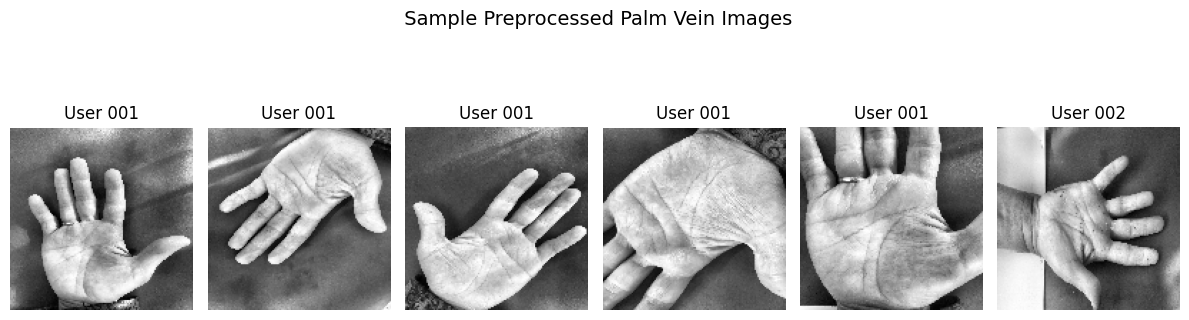

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image, size=(128, 128), apply_clahe=True):
    image = cv2.resize(image, size)
    if apply_clahe:
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        image = clahe.apply(image)
    image = image / 255.0
    return image

def preprocess_full_dataset(data_dir, resize_dim=(128, 128), max_users=5, max_images_per_user=5):
    X = []
    y = []

    print(f" Scanning dataset at: {data_dir}")
    user_ids = sorted(os.listdir(data_dir))[:max_users]
    print(f" Found {len(user_ids)} users. Processing up to {max_images_per_user} images per user.")

    for user_id in user_ids:
        user_path = os.path.join(data_dir, user_id)
        if os.path.isdir(user_path):
            img_files = [f for f in os.listdir(user_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))][:max_images_per_user]

            for img_file in img_files:
                img_path = os.path.join(user_path, img_file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                if img is not None:
                    processed = preprocess_image(img, resize_dim)
                    X.append(processed)
                    y.append(user_id)
                    print(f" Processed: {img_file} (User: {user_id})")
                else:
                    print(f"  Failed to load: {img_file} (User: {user_id})")

    print(f"\n Total images processed: {len(X)}")
    return np.array(X), np.array(y)

# Replace with your dataset path if different
data_dir = "BMPD_Dataset/Birjand University Mobile Palmprint Database (BMPD)"

X_preprocessed, y_labels = preprocess_full_dataset(data_dir)

plt.figure(figsize=(12, 4))

for i in range(6):
    plt.subplot(1, 6, i + 1)
    plt.imshow(X_preprocessed[i], cmap='gray')
    plt.title(f"User {y_labels[i]}")
    plt.axis('off')

plt.suptitle(" Sample Preprocessed Palm Vein Images", fontsize=14)
plt.tight_layout()
plt.show()



### **Compare original vs processed in a quick plot**

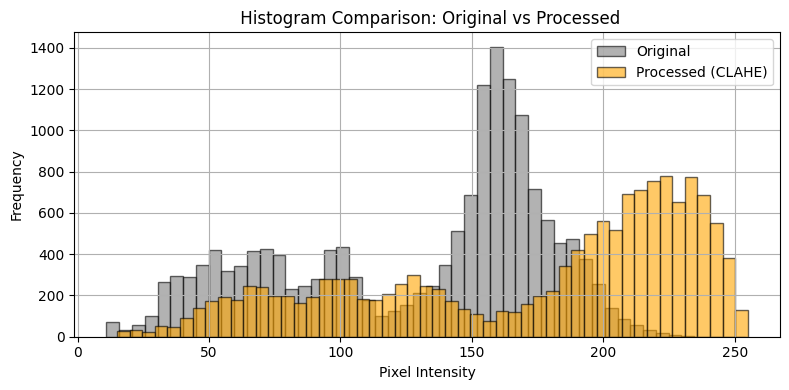

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def plot_histogram_comparison(original_gray, processed_norm):
    # Ensure both are 2D grayscale images
    if original_gray is None or processed_norm is None:
        print(" Error: One or both images are missing.")
        return

    # Flatten to 1D arrays
    orig_pixels = original_gray.flatten()
    proc_pixels = (processed_norm * 255).astype(np.uint8).flatten()

    # Plot histograms
    plt.figure(figsize=(8, 4))
    plt.hist(orig_pixels, bins=50, alpha=0.6, label='Original', color='gray', edgecolor='black')
    plt.hist(proc_pixels, bins=50, alpha=0.6, label='Processed (CLAHE)', color='orange', edgecolor='black')
    plt.title(" Histogram Comparison: Original vs Processed")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Load a sample image from your dataset
img = cv2.imread(image_paths[0], cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img, (128, 128))
proc = preprocess_image(img_resized)

# Plot histogram comparison
plot_histogram_comparison(img_resized, proc)
